Задание 1 - 2

Первый шаг – загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, типы данных, размерность, наличие пропущенных значений.

В каком столбце встретилось больше всего пропущенных значений? В качестве ответа укажите их число, после чего удалите строки с пропущенными значениями из датасета.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("games.csv")

In [4]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [5]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [6]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [12]:
df = df.dropna()

3. Выведите описательные характеристики переменной Year и постройте график распределения количества выпущенных игр по годам.

In [20]:
df.Year.mode()

0    2009.0
dtype: float64

In [25]:
df.Year.median()

2007.0

In [28]:
df.Year.mean()

2006.4055613528942

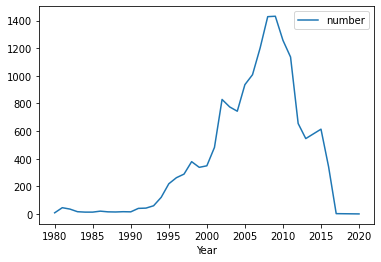

In [34]:
df.groupby("Year") \
  .agg({"Publisher" : "count"}) \
  .rename(columns = {"Publisher" : "number"}).plot();

3. На каких платформах произошло больше всего релизов?

Оставьте названия только тех платформ, частота встречаемости которых составляет более 7%. Значения укажите в порядке убывания частоты встречаемости через запятую с пробелом.

In [37]:
platforms_releases = df.groupby("Platform", as_index = False) \
  .agg({"Year" : "count"}) \
  .rename(columns = {"Year" : "release"}) \
  .sort_values("release", ascending = False)

In [38]:
platforms_releases["frequency"] = platforms_releases.release / platforms_releases.release.sum() * 100

In [40]:
platforms_releases.query("frequency > 7")

,Platform,release,frequency
4,DS,2131,13.080842
16,PS2,2127,13.056289
17,PS3,1304,8.004420
26,Wii,1290,7.918483
28,X360,1234,7.574735
19,PSP,1197,7.347615
15,PS,1189,7.298508


4. Игры каких издателей (Publisher) встречаются в датасете чаще всего?

В качестве ответа укажите наибольшую абсолютную частоту встречаемости.

In [47]:
publishers_number = df.groupby("Publisher", as_index = False) \
  .agg({"Year" : "count"}) \
  .rename(columns = {"Year" : "number"}) \
  .sort_values("number", ascending = False)

In [49]:
publishers_number

,Publisher,number
138,Electronic Arts,1339
21,Activision,966
347,Namco Bandai Games,928
524,Ubisoft,918
275,Konami Digital Entertainment,823
...,...,...
149,Ertain,1
147,Epic Games,1
447,Seventh Chord,1
145,Enjoy Gaming ltd.,1


5. Сфокусируемся на играх от Nintendo. Посчитайте среднее, медиану и стандартное отклонение по продажам игр данного издателя в разных регионах (NA, EU, JP, Other). 

В каком регионе медианное значение объема продаж является наибольшим?

In [63]:
df.query("Publisher == 'Nintendo'")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].mean()

NA_Sales       1.172055
EU_Sales       0.601006
JP_Sales       0.653721
Other_Sales    0.136767
dtype: float64

In [64]:
df.query("Publisher == 'Nintendo'")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].median()

NA_Sales       0.375
EU_Sales       0.120
JP_Sales       0.280
Other_Sales    0.030
dtype: float64

In [65]:
df.query("Publisher == 'Nintendo'")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].std()

NA_Sales       2.989913
EU_Sales       1.743953
JP_Sales       1.063110
Other_Sales    0.464170
dtype: float64

In [66]:
df.query("Publisher == 'Nintendo'")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].agg({"mean", "median", "std"})

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
std,2.989913,1.743953,1.063110,0.464170
mean,1.172055,0.601006,0.653721,0.136767
median,0.375000,0.120000,0.280000,0.030000


6. Теперь посмотрим на продажи Nintendo в Японии по жанрам. Постройте боксплот, где:

 - по оси x будет расположен жанр игры (Genre)
 -  по оси у – объем продаж в Японии (JP_sales)  .
 
Взглянем на получившиеся боксплоты. Что мы можем по ним сказать о данных?

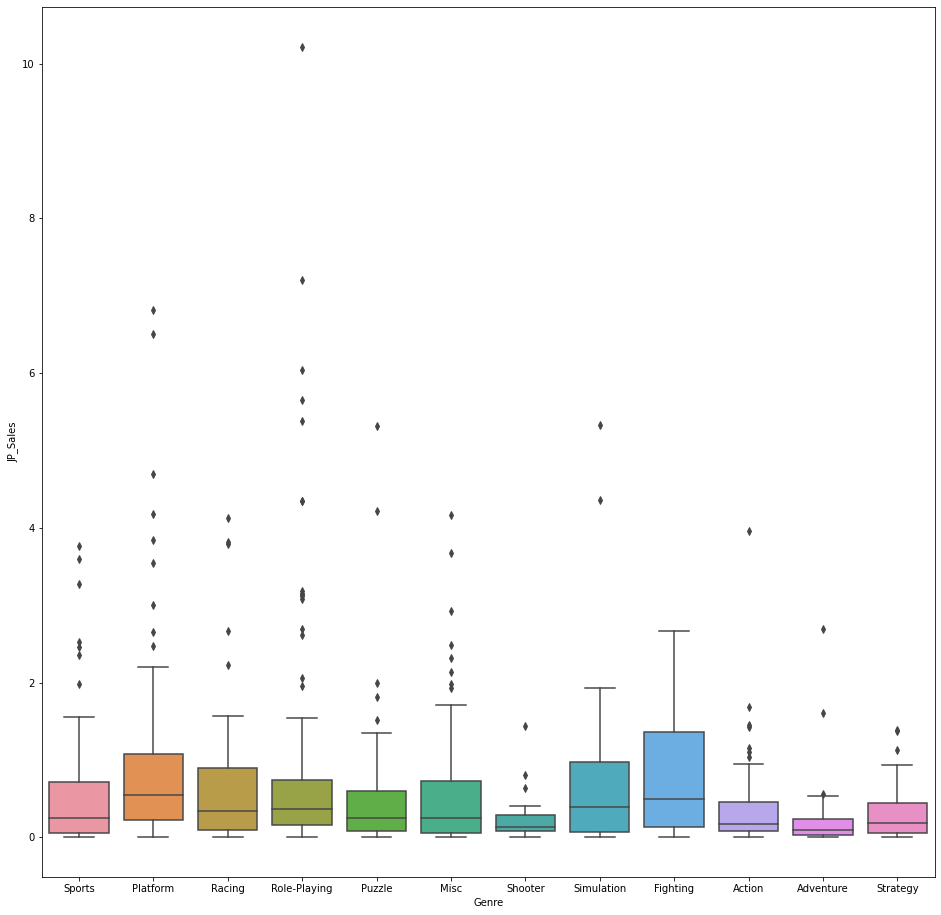

In [85]:
plt.figure(figsize=(16,16))
ax = sns.boxplot(x = "Genre", y = "JP_Sales", data = df.query("Publisher == 'Nintendo'"))

7. Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports.

На каком отрезке времени игры жанра Sports были наиболее популярны? Иными словами, выберите наименьший отрезок, который включает в себя несколько крупных пиков. 

In [89]:
global_sales_dynamic = df.query('Publisher == "Nintendo" and (Genre == "Fighting" or Genre == "Simulation" or Genre == "Platform" or Genre == "Racing" or Genre == "Sports")') \
  .groupby(["Year", "Genre"], as_index = False) \
  .agg({"Global_Sales" : "sum"})

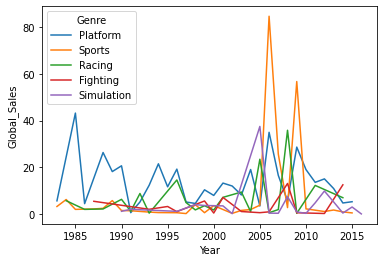

In [91]:
ax = sns.lineplot(x = 'Year', y = 'Global_Sales', hue = 'Genre' , data = global_sales_dynamic)